In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
from scipy import stats
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
# read the large csv file with specified chunksize 
reader = pd.read_csv('train.csv', chunksize=500)
df = [chunk for chunk in reader]

In [4]:
df[10].head(10)

,ID,Class
5000,8046,siren
5001,8047,car_horn
5002,8048,engine_idling
5003,8049,car_horn
5004,8050,car_horn
5005,8052,street_music
5006,8053,street_music
5007,8055,drilling
5008,8057,jackhammer
5009,8058,children_playing


In [5]:
# set label values for Categorical variable
classes_dict = {item:num for num, item in enumerate(list(set(pd.concat(df, sort=True).Class)))}
classes_dict

{'gun_shot': 0,
 'engine_idling': 1,
 'children_playing': 2,
 'drilling': 3,
 'dog_bark': 4,
 'siren': 5,
 'street_music': 6,
 'air_conditioner': 7,
 'jackhammer': 8,
 'car_horn': 9}

In [9]:
def process_chunk(df):
    # load audio .wav files and perform fft transformation on the dataframe
    print('Loading WAV files and performing FFT transformations.')
    waves, waves_fft = [], []
    for item in df.ID:
        fp = 'train/Train/' + str(item) + '.wav'
        wav = sf.read(fp)[0]
        tmp = [w[0] if type(w)==np.ndarray else w for w in wav]
        waves.append(tmp)
        waves_fft.append(np.fft.fft(tmp))
    
    # load .wav files and fft transforms into dataframe
    print('Loading into dataframe.')
    df['Audio'] = waves
    df['FFT'] = waves_fft 
    
    # set labels and add length
    print('Adding length and labels.')
    df['Label'] = [classes_dict[item] for item in df.Class]
    df['Length'] = [len(i) for i in df.Audio]
    
    print('Complete.')
    return df[['ID', 'Class', 'Audio', 'FFT', 'Length', 'Label']]

In [10]:
for num in range(len(df)):
    print('Processing chunk', num)
    df[num] = process_chunk(df[num])

Processing chunk 0
Loading WAV files and performing FFT transformations.
Loading into dataframe.
Adding length and labels.
Complete.
Processing chunk 1
Loading WAV files and performing FFT transformations.
Loading into dataframe.
Adding length and labels.
Complete.
Processing chunk 2
Loading WAV files and performing FFT transformations.
Loading into dataframe.
Adding length and labels.
Complete.
Processing chunk 3
Loading WAV files and performing FFT transformations.
Loading into dataframe.
Adding length and labels.
Complete.
Processing chunk 4
Loading WAV files and performing FFT transformations.
Loading into dataframe.
Adding length and labels.
Complete.
Processing chunk 5
Loading WAV files and performing FFT transformations.
Loading into dataframe.
Adding length and labels.
Complete.
Processing chunk 6
Loading WAV files and performing FFT transformations.
Loading into dataframe.
Adding length and labels.
Complete.
Processing chunk 7
Loading WAV files and performing FFT transformatio

In [11]:
# most frequent length is mode, 192000 and below covers 95% of all signals
print (stats.mode(pd.concat(df).Length))
print (len([x for x in pd.concat(df).Length if x < 192001]), len(pd.concat(df).Length))

ModeResult(mode=array([176400]), count=array([2763]))
5168 5435


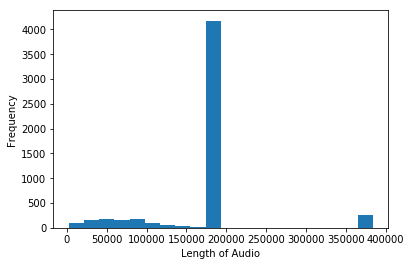

In [12]:
# histogram of audio byte lengths
plt.hist(pd.concat(df).Length, bins=20)
plt.xlabel('Length of Audio')
plt.ylabel('Frequency')
plt.show()

In [16]:
# distribution of labels
labels = to_categorical(pd.concat(df).Label)
classes_dict, sum(labels) / len(labels)

({'gun_shot': 0,
  'engine_idling': 1,
  'children_playing': 2,
  'drilling': 3,
  'dog_bark': 4,
  'siren': 5,
  'street_music': 6,
  'air_conditioner': 7,
  'jackhammer': 8,
  'car_horn': 9},
 array([0.04231831, 0.11481141, 0.11039558, 0.11039558, 0.11039558,
        0.11168353, 0.11039558, 0.11039558, 0.12290709, 0.05630175],
       dtype=float32))

In [18]:
df[0][df[0].Label==0].iloc[0]

ID                                                       12
Class                                              gun_shot
Audio     [-0.002838134765625, -0.001739501953125, -0.00...
FFT       [(-16.46228027343747+0j), (-13.371113975133117...
Length                                                50208
Label                                                     0
Name: 8, dtype: object

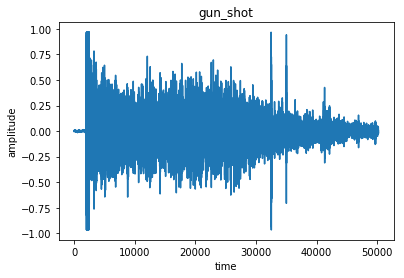

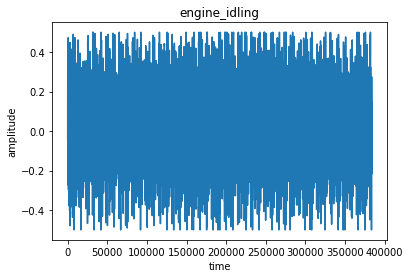

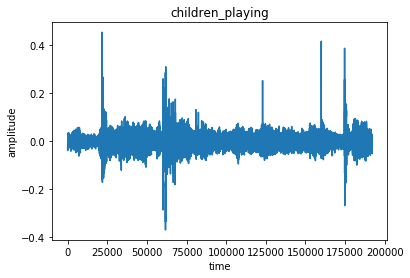

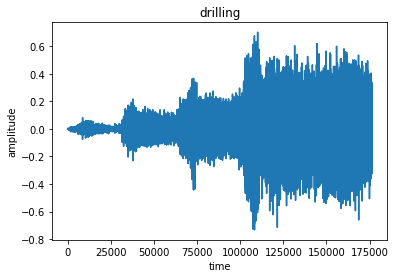

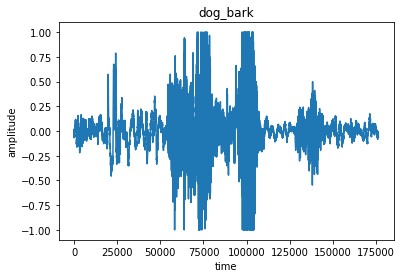

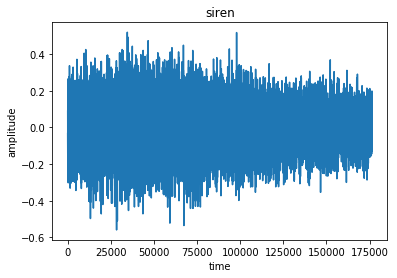

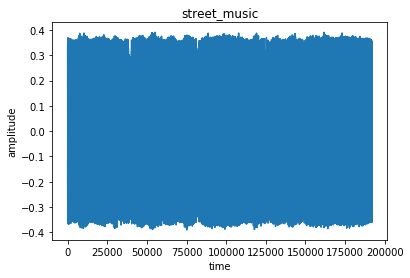

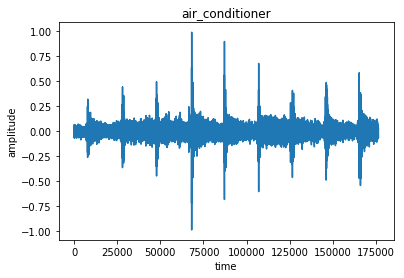

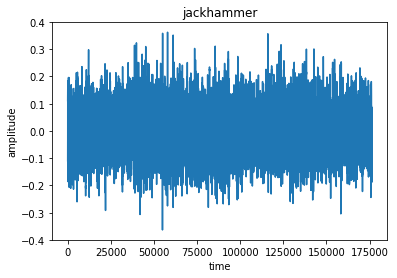

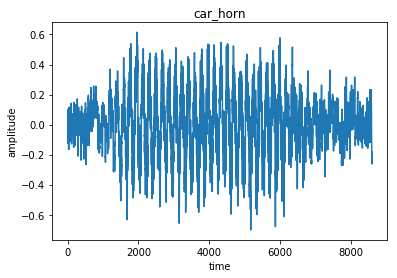

In [19]:
# visualizations of WAV files
for key in classes_dict.keys():
    data = df[0][df[0].Label==classes_dict[key]].iloc[0].Audio
    plt.plot(data)
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.title(key)
    plt.show()

/Users/craigsloane/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


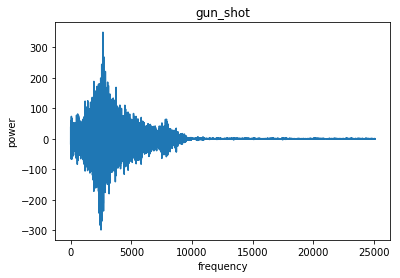

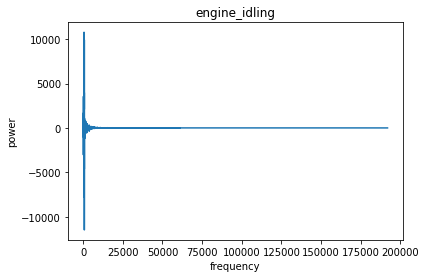

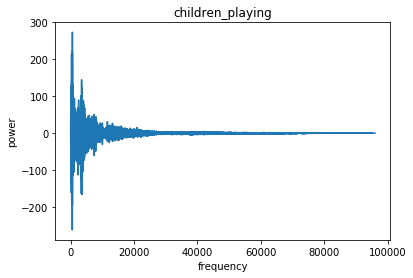

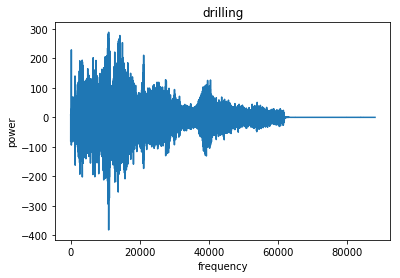

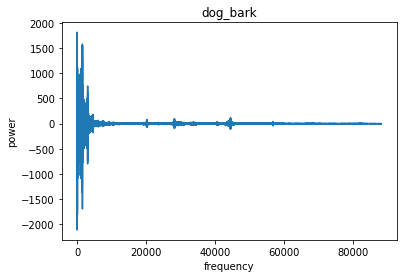

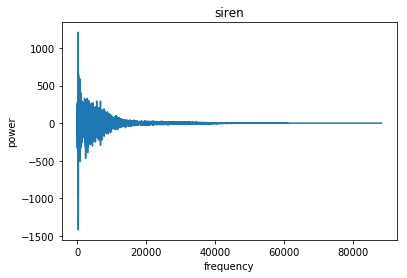

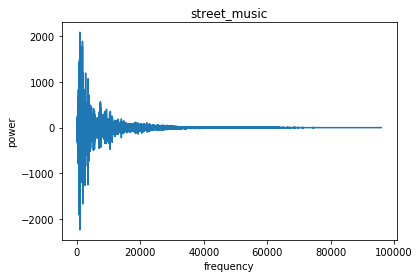

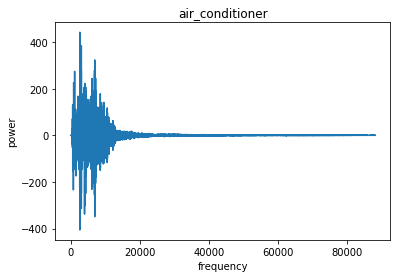

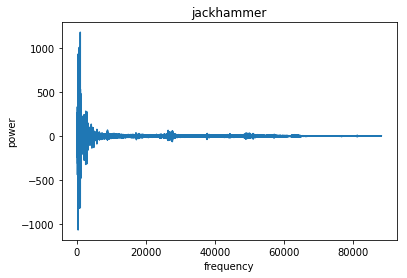

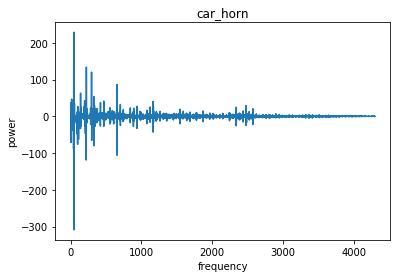

In [20]:
# visualizations of FFT
for key in classes_dict.keys():
    tmp = df[0][df[0].Label==classes_dict[key]].iloc[0]
    data, length = tmp.FFT, int(tmp.Length/2)
    plt.plot(data[:length])
    plt.xlabel("frequency")
    plt.ylabel("power")
    plt.title(key)
    plt.show()

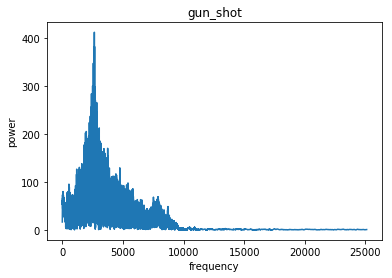

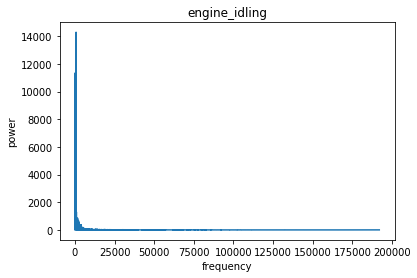

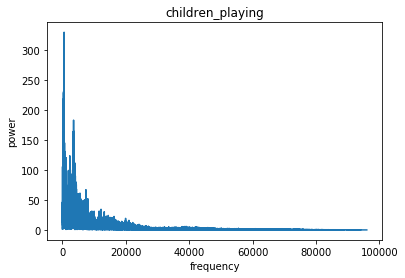

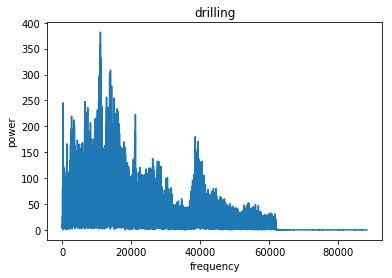

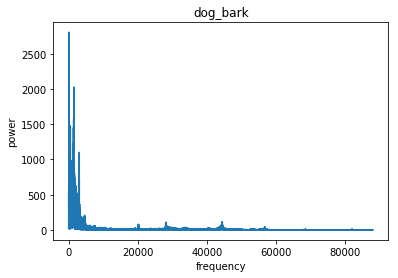

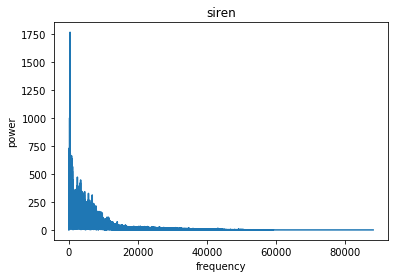

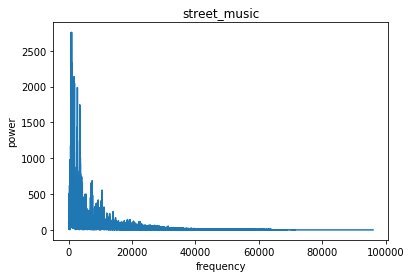

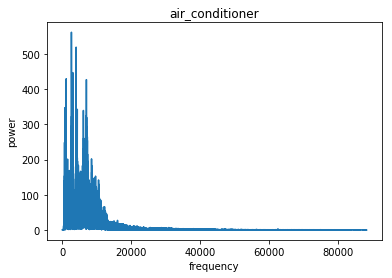

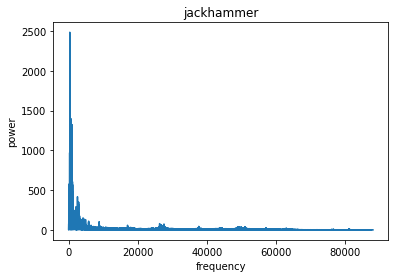

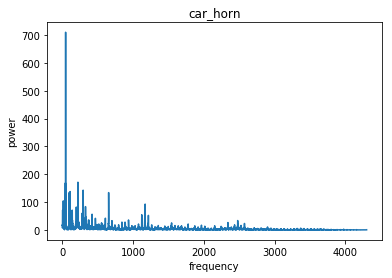

In [21]:
# visualizations of FFT Energy
for key in classes_dict.keys():
    tmp = df[0][df[0].Label==classes_dict[key]].iloc[0]
    data, length = [np.abs(t) for t in tmp.FFT], int(tmp.Length/2)
    plt.plot(data[:length])
    plt.xlabel("frequency")
    plt.ylabel("power")
    plt.title(key)
    plt.show()

In [24]:
def save_json(df, chunk, fp=None):
    print('Processing chunk', chunk)
    print('Converting FFT to energy.')
    out = df[chunk][['ID', 'Class', 'Audio', 'Length', 'Label']]
    out['Energy'] = [[np.abs(f) for f in fft] for fft in df[chunk].FFT]
    out = out[['ID', 'Class', 'Audio', 'Energy', 'Length', 'Label']]
    
    if not fp:
        print('Saving chunk', chunk)
        fp = 'urban_sound_classification_data_exp_' + str(chunk) + '.json'
    out.to_json(fp)
    return

In [25]:
for num in range(0, len(df)):
    save_json(df, num)

Converting FFT to energy.
Saving chunk 0
Converting FFT to energy.
Saving chunk 1
Converting FFT to energy.
Saving chunk 2
Converting FFT to energy.
Saving chunk 3
Converting FFT to energy.
Saving chunk 4
Converting FFT to energy.
Saving chunk 5
Converting FFT to energy.
Saving chunk 6
Converting FFT to energy.
Saving chunk 7
Converting FFT to energy.
Saving chunk 8
Converting FFT to energy.
Saving chunk 9
Converting FFT to energy.
Saving chunk 10
